In [6]:
%run src/plm_trainer_multi.py

from src.tools import reset_cuda
reset_cuda()

for esm2_model_name in ["facebook/esm2_t6_8M_UR50D","facebook/esm2_t12_35M_UR50D","facebook/esm2_t30_150M_UR50D"]:
    for p_loss in [0.0,0.1,0.2,0.3]:

        output_folder        = '../../AIzymes_resi99_multi'
        df_path              = './data/240705_all_scores_resi99.csv'
        cat_resi             = 99
        epochs               = 20        

        reset_cuda()
        
        dataset = PLM_trainer(
            output_folder   = output_folder,
            verbose         = False
            )

        PLM_trainer.load_dataset(    
            dataset,            
            df_path         = df_path,
            scores          = ['total_score','interface_score','efield_score'],
            labels          = ['score_taken_from', 'design_method', 'cat_resn', 'cat_resi', 'parent_index', 'generation', 'mutations'],
            cat_resi        = cat_resi,
            select_unique   = True
            )

        PLM_trainer.train_PLM( 
            dataset,
            epochs          = epochs,
            esm2_model_name = esm2_model_name,
            p_loss          = p_loss 
        )

### PLM trainer loaded. ###
### Data loaded from: ./data/240705_all_scores_resi99.csv ###
### Data normalized. ###
../../AIzymes_resi99_multi/plm_self_model_esm2_t6_8M_UR50D_scores_total_scoreinterface_scoreefield_score_cat_99_epochs_20_ploss_0.0.pkl exists! Stopping calculation
### Data loaded from: ./data/240705_all_scores_resi99.csv ###
### Data normalized. ###
../../AIzymes_resi99_multi/plm_self_model_esm2_t6_8M_UR50D_scores_total_scoreinterface_scoreefield_score_cat_99_epochs_20_ploss_0.1.pkl exists! Stopping calculation
### Data loaded from: ./data/240705_all_scores_resi99.csv ###
### Data normalized. ###
../../AIzymes_resi99_multi/plm_self_model_esm2_t6_8M_UR50D_scores_total_scoreinterface_scoreefield_score_cat_99_epochs_20_ploss_0.2.pkl exists! Stopping calculation
### Data loaded from: ./data/240705_all_scores_resi99.csv ###
### Data normalized. ###
../../AIzymes_resi99_multi/plm_self_model_esm2_t6_8M_UR50D_scores_total_scoreinterface_scoreefield_score_cat_99_epochs_20_ploss_0

  5%|▌         | 1/20 [00:19<06:03, 19.11s/it]

### PLM trainer loaded. ###
All variables loaded from ../../AIzymes_resi99_multi/plm_self_model_esm2_t6_8M_UR50D_scores_total_scoreinterface_scoreefield_score_cat_99_epochs_20_ploss_0.0.pkl


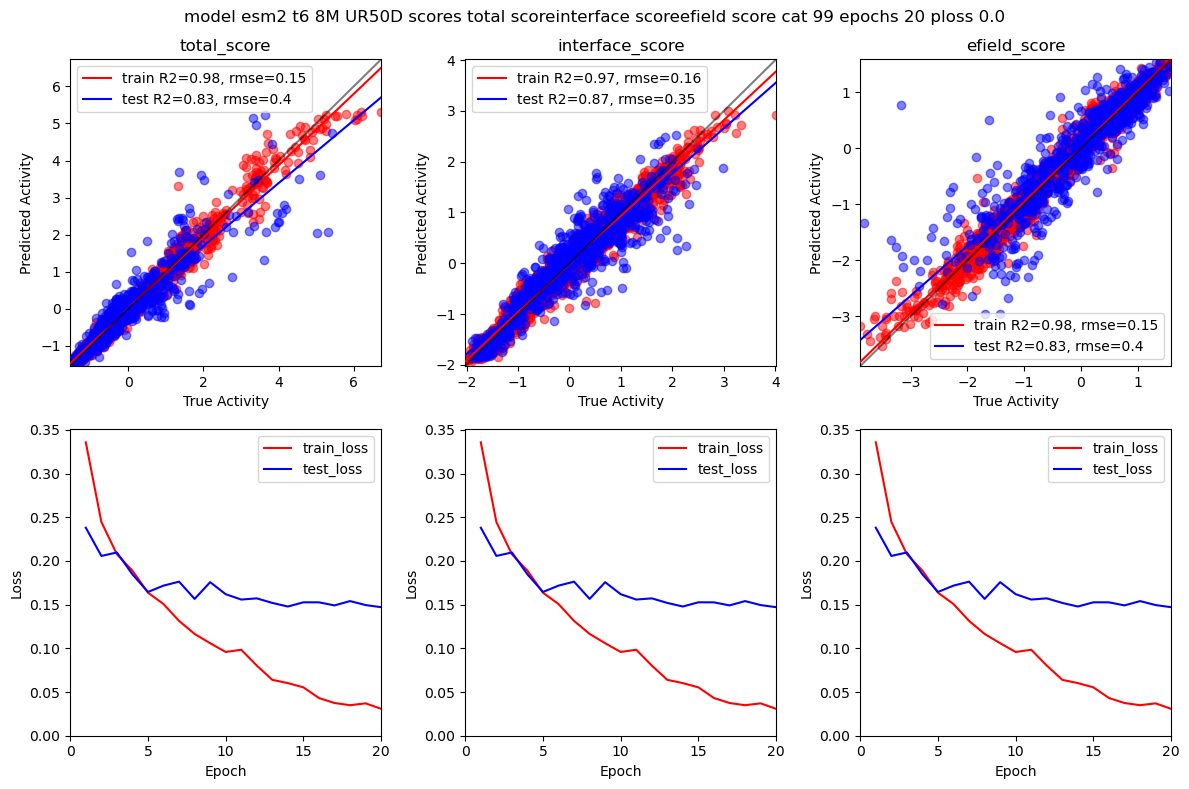

All variables loaded from ../../AIzymes_resi99_multi/plm_self_model_esm2_t6_8M_UR50D_scores_total_scoreinterface_scoreefield_score_cat_99_epochs_20_ploss_0.1.pkl


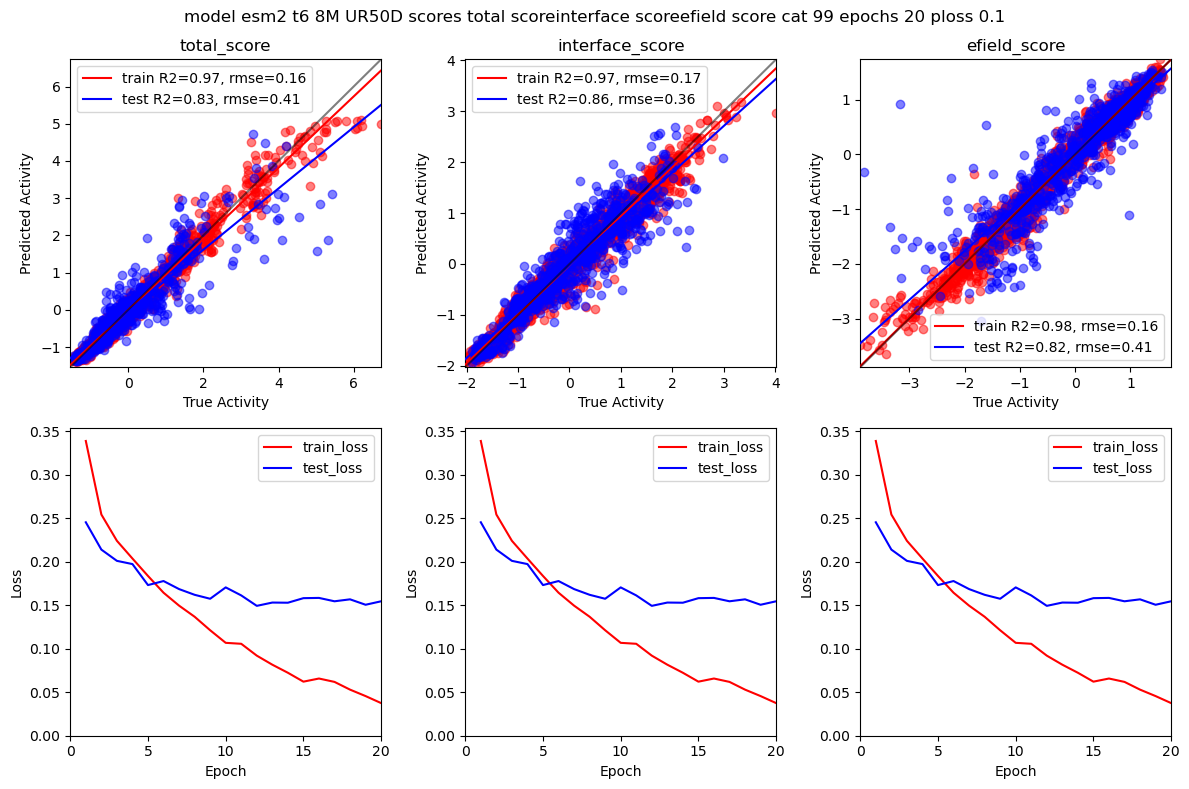

All variables loaded from ../../AIzymes_resi99_multi/plm_self_model_esm2_t6_8M_UR50D_scores_total_scoreinterface_scoreefield_score_cat_99_epochs_20_ploss_0.2.pkl


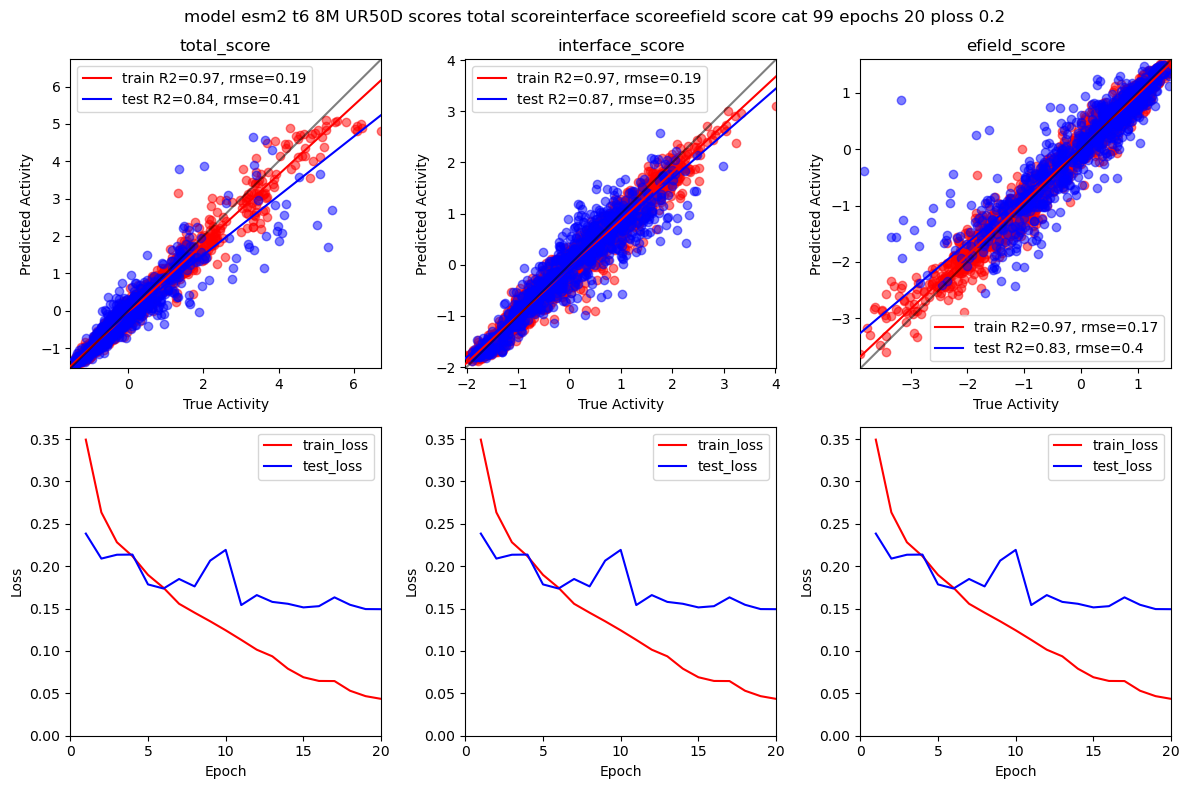

All variables loaded from ../../AIzymes_resi99_multi/plm_self_model_esm2_t6_8M_UR50D_scores_total_scoreinterface_scoreefield_score_cat_99_epochs_20_ploss_0.3.pkl


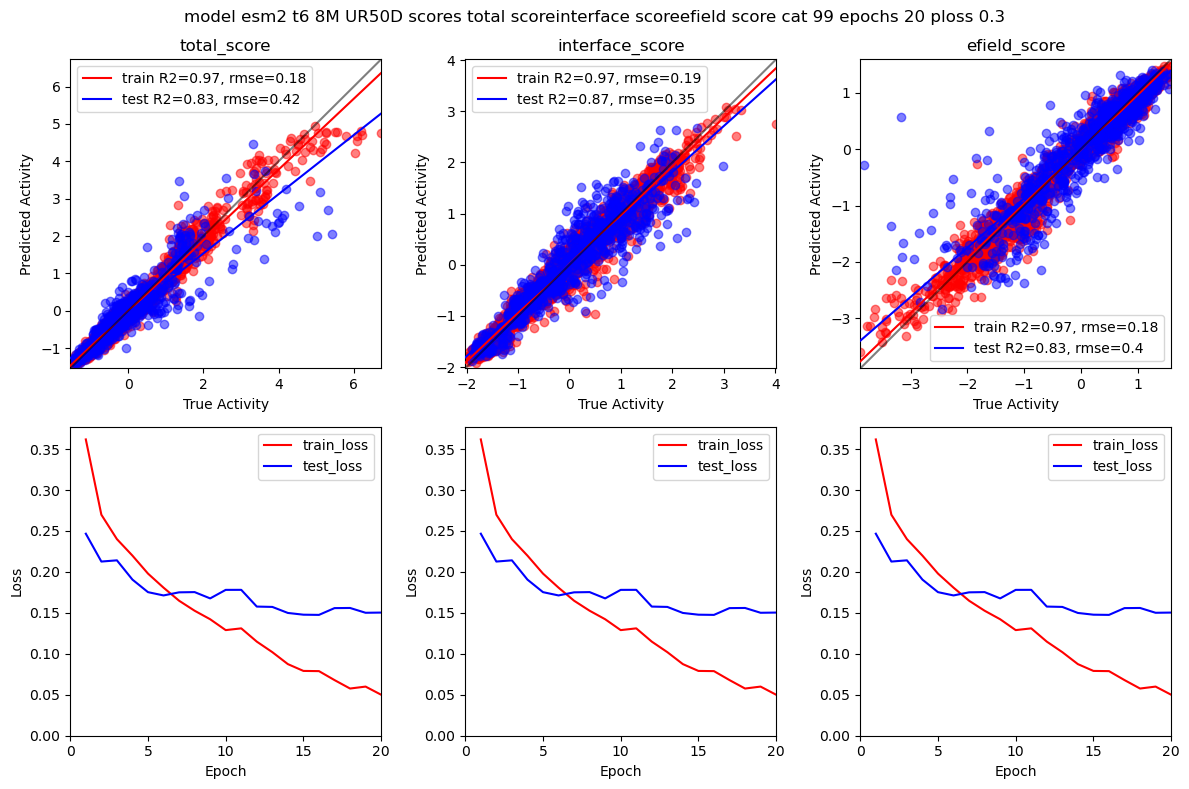

All variables loaded from ../../AIzymes_resi99_multi/plm_self_model_esm2_t12_35M_UR50D_scores_total_scoreinterface_scoreefield_score_cat_99_epochs_20_ploss_0.0.pkl


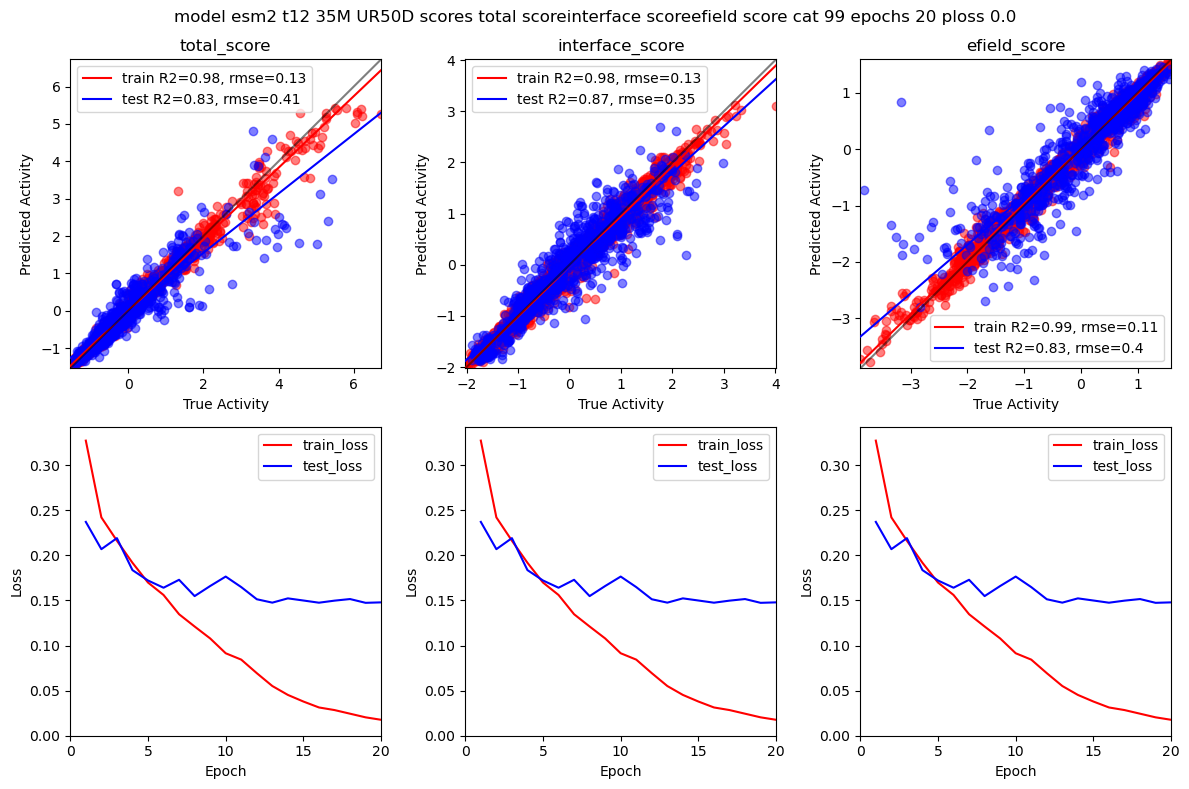

### ../../AIzymes_resi99_multi/plm_self_model_esm2_t12_35M_UR50D_scores_total_scoreinterface_scoreefield_score_cat_99_epochs_20_ploss_0.1.pkl does not exist. ###
### ../../AIzymes_resi99_multi/plm_self_model_esm2_t12_35M_UR50D_scores_total_scoreinterface_scoreefield_score_cat_99_epochs_20_ploss_0.1.pkl does not exist. ###
### ../../AIzymes_resi99_multi/plm_self_model_esm2_t12_35M_UR50D_scores_total_scoreinterface_scoreefield_score_cat_99_epochs_20_ploss_0.2.pkl does not exist. ###
### ../../AIzymes_resi99_multi/plm_self_model_esm2_t12_35M_UR50D_scores_total_scoreinterface_scoreefield_score_cat_99_epochs_20_ploss_0.2.pkl does not exist. ###
### ../../AIzymes_resi99_multi/plm_self_model_esm2_t12_35M_UR50D_scores_total_scoreinterface_scoreefield_score_cat_99_epochs_20_ploss_0.3.pkl does not exist. ###
### ../../AIzymes_resi99_multi/plm_self_model_esm2_t12_35M_UR50D_scores_total_scoreinterface_scoreefield_score_cat_99_epochs_20_ploss_0.3.pkl does not exist. ###


In [ ]:
%run src/plm_trainer_multi.py

for esm2_model_name in ["facebook/esm2_t6_8M_UR50D","facebook/esm2_t12_35M_UR50D","facebook/esm2_t30_150M_UR50D"]:
    for p_loss in [0.0,0.1,0.2,0.3]:
    
        output_folder        = '../../AIzymes_resi99_multi'
        df_path              = './data/240705_all_scores_resi99.csv'
        cat_resi             = 99
        epochs               = 20

        dataset = PLM_trainer(
            output_folder   = output_folder,
            verbose         = True
            )

        PLM_trainer.load_self_from_file(
            dataset,
            epochs          = epochs,
            esm2_model_name = esm2_model_name,
            cat_resi        = cat_resi,
            p_loss          = p_loss,
            df_path         = df_path,
            scores           = ['total_score','interface_score','efield_score'],
        )

        PLM_trainer.plot_learning(
            dataset
        )

### PLM trainer loaded. ###


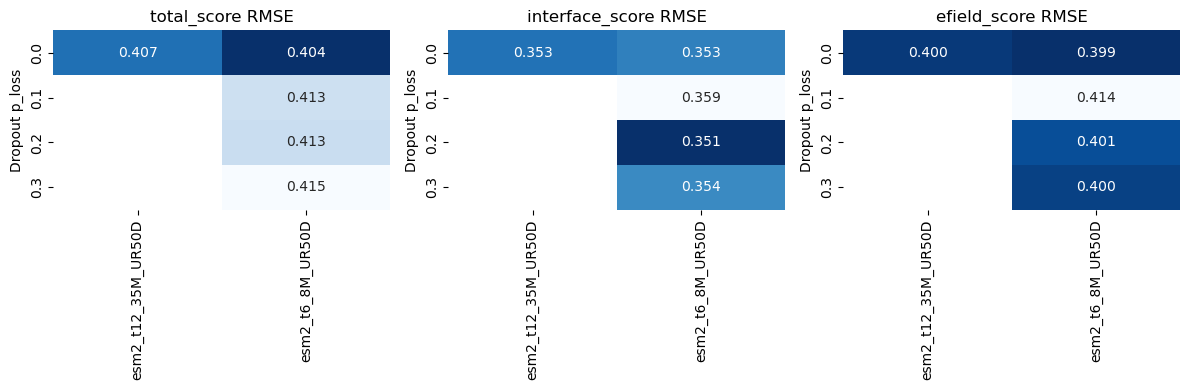

In [5]:
%run src/plm_trainer_multi.py
output_folder = '../../AIzymes_resi99_multi'
plot_summary(output_folder)